### Load the data
https://www.kaggle.com/c/bike-sharing-demand
We only need train.csv

### Further Reading
https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

### Setup
~~~~
pip install graphviz
sudo apt-get install graphviz
~~~~

In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data/train.csv')

Show first rows of dataframe

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Plot distribution of "count"

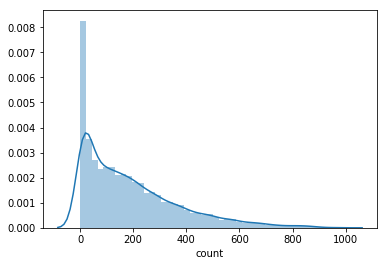

In [4]:
sns.distplot(df['count'])

Select numeric datafields for X, but not the last three columns.
Select 'count' for y.

In [5]:
f_numeric = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
target = ['count']
X = df[f_numeric]
y = df['count']

Create test and training set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a DecisionTreeRegressor.

In [13]:
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(X_train, y_train)

Predict the training set.

In [14]:
y_train_pred = clf.predict(X_train)

Predict the test set.

In [15]:
y_test_pred = clf.predict(X_test)

Calculate the r2 score for the training set.

In [16]:
r2_score(y_train, y_train_pred, multioutput='variance_weighted')

0.19378482850392864

Calculate the r2 score for the test set.

In [17]:
r2_score(y_test, y_test_pred, multioutput='variance_weighted')

0.21012600287875072

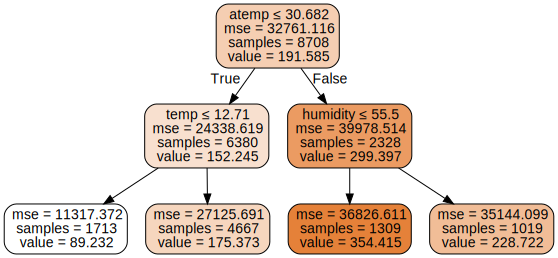

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=f_numeric,  
                         class_names=clf.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### Homework
* Do the calculation with different max_depth. 
* Plot the performance for different max_depth: Insample (training), Out-of-sample (test)
* Add features from datetime.
  * Time
  * Day of the week
  * ...
* Compare with linear regression.